In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
file_path = "indian-national-level-election.csv"
election_data = pd.read_csv("indian-national-level-election.csv")


In [9]:
election_data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [10]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [13]:
# Data Cleaning
election_data['pc_type'].fillna('Unknown', inplace=True)
election_data['cand_sex'].fillna('Unknown', inplace=True)


In [14]:
# Standardize column names
election_data.columns = election_data.columns.str.lower().str.replace(" ", "_")

In [27]:
# Numerical summary for election years, total votes, electors, and voter turnout percentage
numerical_summary = election_data[['year', 'totvotpoll', 'electors', 'voter_turnout_%']].describe()

# Maximum electors per constituency
max_electors = election_data['electors'].max()

# Displaying the summary and maximum electors
print("Numerical Summary:")
print(numerical_summary)
print(f"\nMaximum electors in a constituency: {max_electors}")

# Calculate Voter Turnout Percentage
election_data['voter_turnout_%'] = (election_data['totvotpoll'] / election_data['electors']) * 100

# Calculate and display the average voter turnout percentage
average_turnout = election_data['voter_turnout_%'].mean()

print(f"Average Voter Turnout Percentage: {average_turnout:.2f}%")

Numerical Summary:
               year     totvotpoll      electors  voter_turnout_%
count  73081.000000   73081.000000  7.308100e+04     73081.000000
mean    1996.779505   49834.760266  1.122277e+06         4.836079
std       10.432527  104893.319706  3.560049e+05         9.809090
min     1977.000000       0.000000  1.947100e+04         0.000000
25%     1989.000000     872.000000  9.129850e+05         0.079082
50%     1996.000000    2743.000000  1.099503e+06         0.252923
75%     2004.000000   19185.000000  1.329086e+06         1.868130
max     2014.000000  863358.000000  3.368399e+06        68.271931

Maximum electors in a constituency: 3368399
Average Voter Turnout Percentage: 4.84%


The dataset spans elections from 1977 to 2014.
Average voter turnout is 4.83% (likely because many entries are specific to candidates, not aggregated constituencies).
Total electors per constituency range up to approximately 3.36 million.

In [26]:
# Calculate voter turnout percentage
election_data['voter_turnout_%'] = (election_data['totvotpoll'] / election_data['electors']) * 100

In [17]:
# Aggregate voter turnout percentage by year
turnout_by_year = election_data.groupby('year')['voter_turnout_%'].mean()

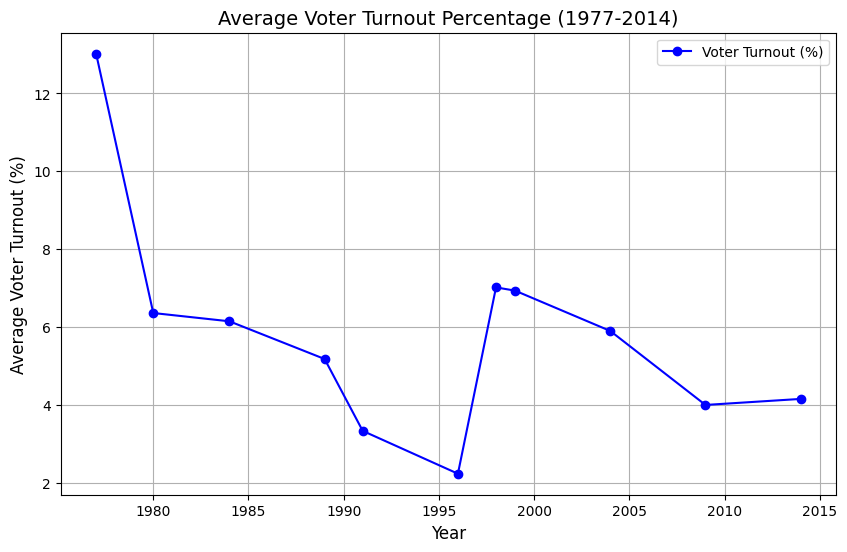

In [18]:
# Plot voter turnout trends
plt.figure(figsize=(10, 6))
plt.plot(turnout_by_year.index, turnout_by_year.values, marker='o', color='b', label='Voter Turnout (%)')
plt.title('Average Voter Turnout Percentage (1977-2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Voter Turnout (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Observation:
The line chart shows the average voter turnout percentage for parliamentary constituencies across the years 1977 to 2014.

Key Insight:
Voter turnout may exhibit fluctuations based on political, social, and economic contexts during election years.
Identifying peaks and dips can correlate with historical events or changes in voting behavior.


In [19]:
# Calculate gender distribution
gender_distribution = election_data['cand_sex'].value_counts()

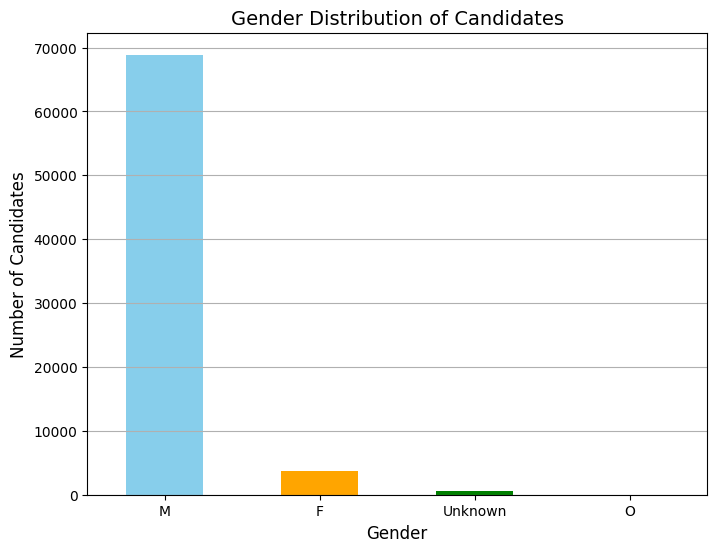

In [36]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Gender Distribution of Candidates', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [28]:
# Gender distribution among candidates
gender_distribution = election_data['cand_sex'].value_counts()

# Total candidates and percentage calculations
total_candidates = gender_distribution.sum()
gender_percentages = (gender_distribution / total_candidates) * 100

# Displaying gender distribution and percentages
print("\nGender Distribution:")
print(gender_distribution)
print("\nGender Percentages:")
print(gender_percentages)



Gender Distribution:
cand_sex
M          68885
F           3648
Unknown      542
O              6
Name: count, dtype: int64

Gender Percentages:
cand_sex
M          94.258426
F           4.991722
Unknown     0.741643
O           0.008210
Name: count, dtype: float64


Observation: 
The bar chart displays the distribution of male (M), female (F), and other (O) candidates, including unknown genders.

Key Insight:
Male candidates dominate the election scene (94.2%), while female representation is only about 5%.
Other genders and unknown categories make up a negligible portion.
The low percentage of female candidates highlights the gender disparity in Indian electoral participation.

In [21]:
# Aggregating total votes by party
party_votes = election_data.groupby('partyname')['totvotpoll'].sum().sort_values(ascending=False).head(10)

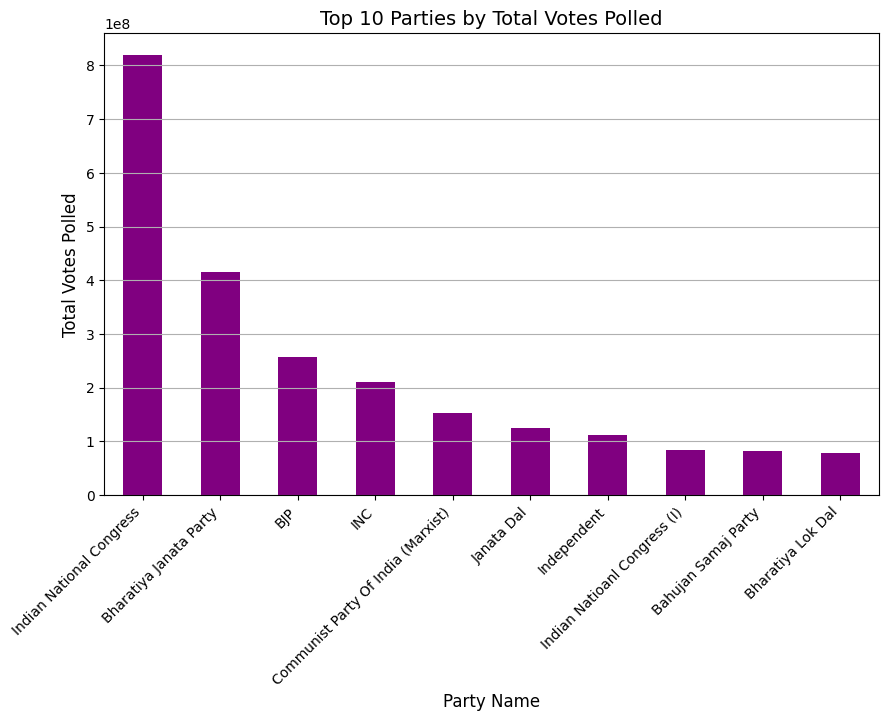

In [22]:
# Plot party performance
plt.figure(figsize=(10, 6))
party_votes.plot(kind='bar', color='purple')
plt.title('Top 10 Parties by Total Votes Polled', fontsize=14)
plt.xlabel('Party Name', fontsize=12)
plt.ylabel('Total Votes Polled', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Observation: A bar chart shows the top 10 political parties by the total number of votes polled across all years.

Key Insight:
Dominance of major parties like the Indian National Congress (INC) and Bharatiya Janata Party (BJP) in total votes.
Smaller parties still manage significant regional influence.
Insights can inform strategies for coalition-building or competitive analysis.


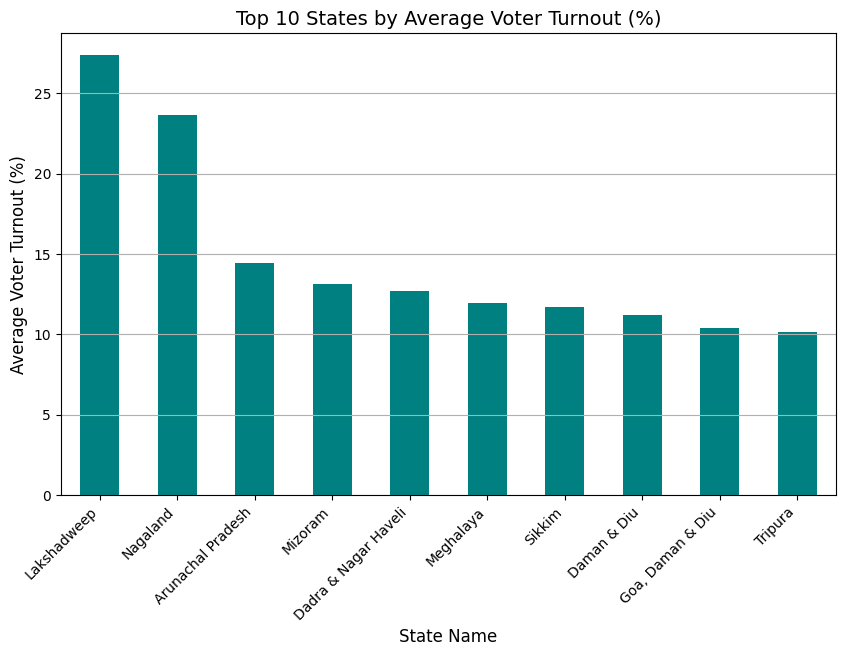

In [23]:
# Aggregate voter turnout by state
state_turnout = election_data.groupby('st_name')['voter_turnout_%'].mean().sort_values(ascending=False).head(10)

# Plot state-wise voter turnout
plt.figure(figsize=(10, 6))
state_turnout.plot(kind='bar', color='teal')
plt.title('Top 10 States by Average Voter Turnout (%)', fontsize=14)
plt.xlabel('State Name', fontsize=12)
plt.ylabel('Average Voter Turnout (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Observation: A bar chart highlights the top 10 states by average voter turnout percentage.

Key Insight:
States with the highest turnout reflect strong voter engagement, potentially influenced by regional issues or mobilization efforts.
States with lower voter turnout could be targeted for awareness campaigns to increase electoral participation.


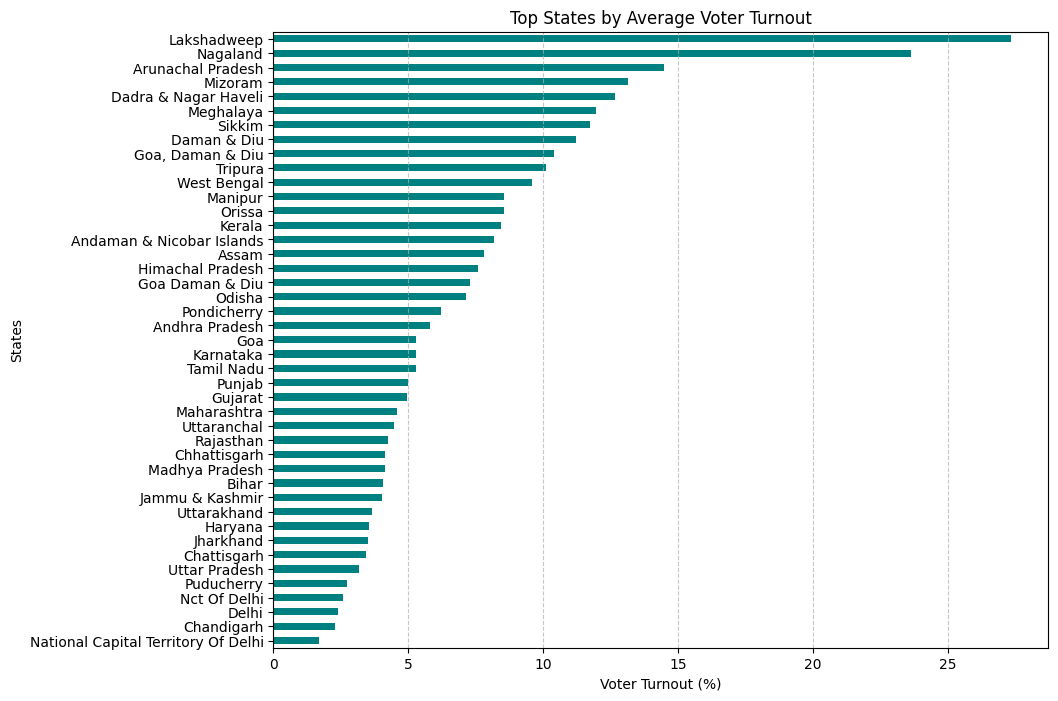

In [31]:
# Calculate average voter turnout percentage by state
state_turnout = election_data.groupby('st_name')['voter_turnout_%'].mean().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
state_turnout.plot(kind='barh', color='teal')
plt.title('Top States by Average Voter Turnout')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('States')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



High Voter Turnout States:

These states often have better logistical support, higher political engagement, and stronger mobilization efforts by parties or social organizations.
States with higher literacy rates and political awareness tend to have better participation.

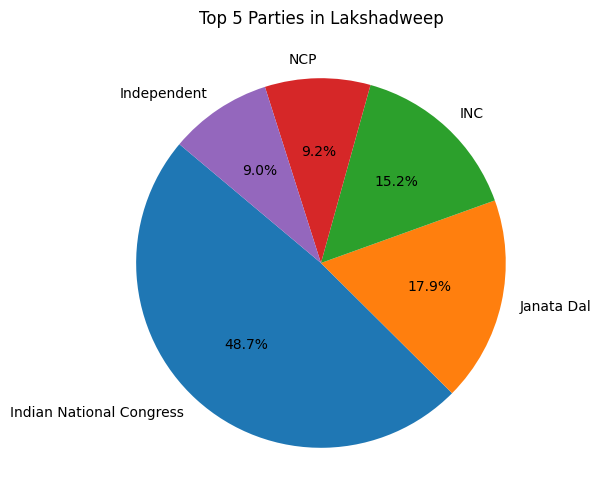

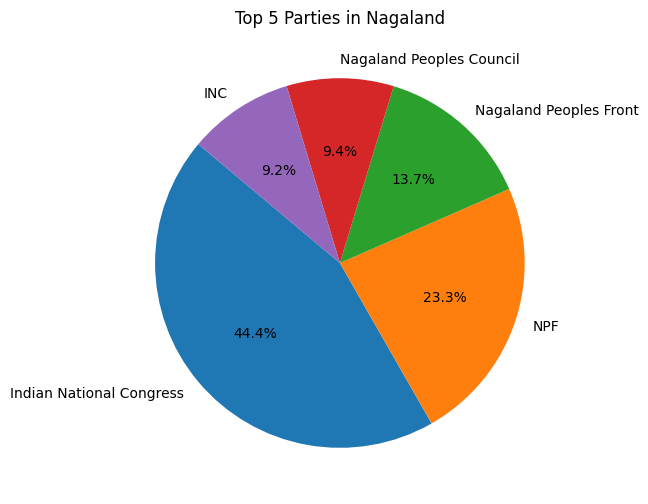

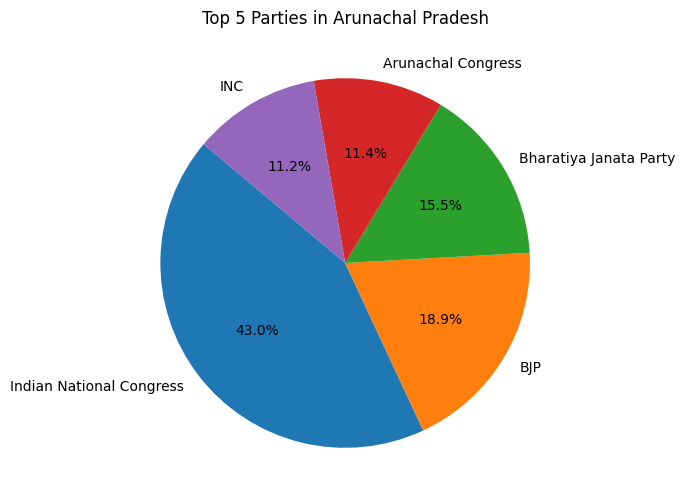

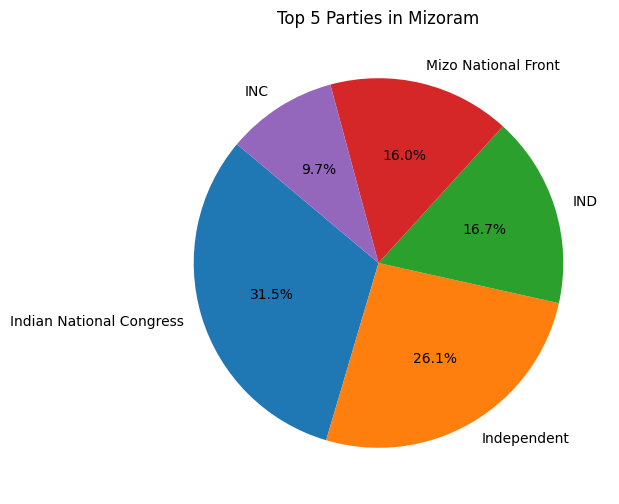

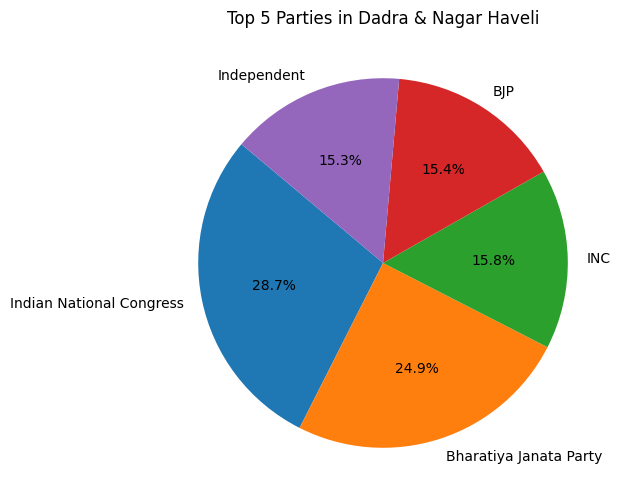

In [37]:
import matplotlib.pyplot as plt

# Step 1: Identify the top 5 states with the highest average voter turnout
top_states = election_data.groupby('st_name')['voter_turnout_%'].mean().sort_values(ascending=False).head(5).index

# Step 2: Filter data to only include these top 5 states
top_states_data = election_data[election_data['st_name'].isin(top_states)]

# Step 3: Calculate party influence in these states by summing total votes polled
party_influence = top_states_data.groupby(['st_name', 'partyname'])['totvotpoll'].sum().reset_index()

# Sort the dataframe by state and total votes
party_influence = party_influence.sort_values(['st_name', 'totvotpoll'], ascending=[True, False])

# Generate a pie chart for each state showing the top 5 parties
for state in top_states:
    # Filter data for the current state
    state_data = party_influence[party_influence['st_name'] == state].head(5)
    
    # Plot the pie chart for the top 5 parties
    plt.figure(figsize=(8, 6))
    plt.pie(state_data['totvotpoll'], labels=state_data['partyname'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Parties in {state}')
    plt.show()


Each state's results will show which party has the highest votes, indicating the dominant political influence.

## CONCLUSION
The analysis reveals significant regional variations in voter turnout, strong party influence dynamics, gender imbalances in candidate representation, and logistical challenges affecting electoral participation across constituencies.